<a href="https://colab.research.google.com/github/VicenteJFonseca/previs-o_pre-o_carros/blob/main/previs%C3%A3o_pre%C3%A7os_carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fonte dados: https://www.kaggle.com/datasets/vagnerbessa/average-car-prices-bazil


---



# Importando Dados e Bibliotecas Python

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
fipe22 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Datasets/fipe_2022.csv", delimiter = ",")

# Visualização dos Dados

In [4]:
fipe22.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [5]:
fipe22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


## Aplicando Pandas Profiling

In [6]:
# %pip install -U pandas-profiling
# from pandas_profiling import ProfileReport
# profile = ProfileReport(fipe22)

In [7]:
# profile.to_notebook_iframe()

# Pré-processamento dos dados

## Tratamento da variável 'brand'

In [8]:
fipe22.brand.value_counts(normalize=True)

GM - Chevrolet     0.097077
VW - VolksWagen    0.096949
Fiat               0.091510
Ford               0.083197
Mercedes-Benz      0.060184
                     ...   
Saturn             0.000083
GEELY              0.000083
Saab               0.000083
Lotus              0.000083
SHINERAY           0.000083
Name: brand, Length: 86, dtype: float64

In [9]:
brand = fipe22.brand.value_counts(normalize=True)

In [10]:
brand

GM - Chevrolet     0.097077
VW - VolksWagen    0.096949
Fiat               0.091510
Ford               0.083197
Mercedes-Benz      0.060184
                     ...   
Saturn             0.000083
GEELY              0.000083
Saab               0.000083
Lotus              0.000083
SHINERAY           0.000083
Name: brand, Length: 86, dtype: float64

In [11]:
df_brand = pd.DataFrame(brand)

In [12]:
df_brand

,brand
GM - Chevrolet,0.097077
VW - VolksWagen,0.096949
Fiat,0.091510
Ford,0.083197
Mercedes-Benz,0.060184
...,...
Saturn,0.000083
GEELY,0.000083
Saab,0.000083
Lotus,0.000083


In [13]:
df_brand[df_brand["brand"] < 0.01]

,brand
Jaguar,0.009605
MINI,0.008103
Chrysler,0.006284
Lexus,0.006025
Caoa Chery,0.005453
...,...
Saturn,0.000083
GEELY,0.000083
Saab,0.000083
Lotus,0.000083


In [14]:
several_brands = df_brand[df_brand["brand"] < 0.01].index.tolist()

In [15]:
fipe22['brand'] = fipe22['brand'].replace( several_brands, 'Others Brands')

In [16]:
fipe22['brand'].value_counts(normalize = True)

Others Brands      0.106416
GM - Chevrolet     0.097077
VW - VolksWagen    0.096949
Fiat               0.091510
Ford               0.083197
Mercedes-Benz      0.060184
Renault            0.052343
Audi               0.041919
Peugeot            0.038350
Toyota             0.035515
Mitsubishi         0.035077
BMW                0.034657
Citroën            0.030247
Hyundai            0.025786
Land Rover         0.024022
Nissan             0.023719
Porsche            0.023426
Volvo              0.020908
Honda              0.019671
Kia Motors         0.018855
Subaru             0.014255
Suzuki             0.013322
Jeep               0.012595
Name: brand, dtype: float64

## Seleção de Variáveis

In [17]:
fipe22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


In [18]:
price_car = fipe22.drop(['year_of_reference','month_of_reference','fipe_code','year_model','authentication','model'], axis = 1)

In [19]:
price_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   brand          290275 non-null  object 
 1   fuel           290275 non-null  object 
 2   gear           290275 non-null  object 
 3   engine_size    290275 non-null  float64
 4   avg_price_brl  290275 non-null  float64
 5   age_years      290275 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 13.3+ MB


## Binarização de variáveis categóricas

In [20]:
avg_price = pd.get_dummies(data = price_car, columns = ['brand','fuel','gear'])

In [21]:
avg_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 31 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   engine_size            290275 non-null  float64
 1   avg_price_brl          290275 non-null  float64
 2   age_years              290275 non-null  int64  
 3   brand_Audi             290275 non-null  uint8  
 4   brand_BMW              290275 non-null  uint8  
 5   brand_Citroën          290275 non-null  uint8  
 6   brand_Fiat             290275 non-null  uint8  
 7   brand_Ford             290275 non-null  uint8  
 8   brand_GM - Chevrolet   290275 non-null  uint8  
 9   brand_Honda            290275 non-null  uint8  
 10  brand_Hyundai          290275 non-null  uint8  
 11  brand_Jeep             290275 non-null  uint8  
 12  brand_Kia Motors       290275 non-null  uint8  
 13  brand_Land Rover       290275 non-null  uint8  
 14  brand_Mercedes-Benz    290275 non-nu

In [22]:
avg_price

,engine_size,avg_price_brl,age_years,brand_Audi,brand_BMW,brand_Citroën,brand_Fiat,brand_Ford,brand_GM - Chevrolet,brand_Honda,...,brand_Subaru,brand_Suzuki,brand_Toyota,brand_VW - VolksWagen,brand_Volvo,fuel_Alcohol,fuel_Diesel,fuel_Gasoline,gear_automatic,gear_manual
0,3.0,43779.0,28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,3.0,42244.0,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,3.0,40841.0,30,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,3.0,39028.0,31,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,3.0,35678.0,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290270,1.6,22894.0,14,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
290271,1.6,22270.0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
290272,1.6,21663.0,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
290273,1.6,21073.0,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


## Transformação de Variáveis: Yeo-Johnson

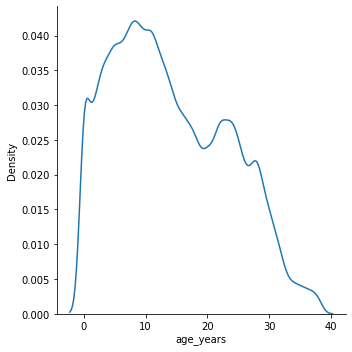

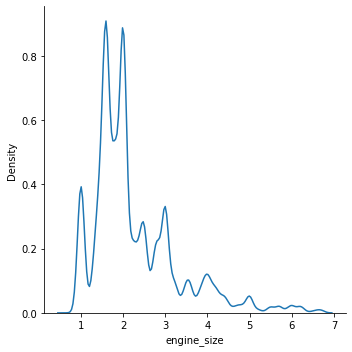

In [23]:
sns.displot(avg_price, x='age_years', kind ='kde')

sns.displot(avg_price, x='engine_size', kind ='kde')


In [24]:
avg_price[["age_years", "engine_size"]].describe()

,age_years,engine_size
count,290275.000000,290275.000000
mean,14.103367,2.266047
std,9.263619,1.033109
min,0.000000,0.700000
25%,7.000000,1.600000
50%,13.000000,2.000000
75%,22.000000,2.800000
max,38.000000,6.700000


In [25]:
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing

In [26]:
features_num = avg_price[['engine_size','age_years']]

In [27]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
yeoj = pt.fit_transform(features_num)

In [28]:
yeo_colunas = list(features_num.columns)
yeo_colunas

['engine_size', 'age_years']

In [29]:
X_yeo= pd.DataFrame(yeoj, columns = yeo_colunas)

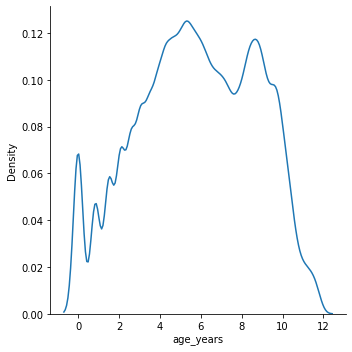

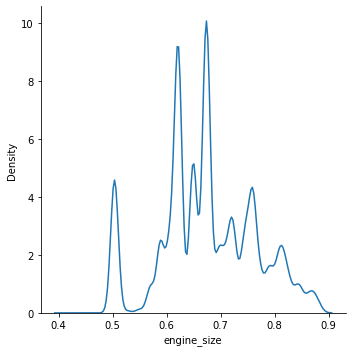

In [30]:
sns.displot(X_yeo, x='age_years', kind ='kde')

sns.displot(X_yeo, x='engine_size', kind ='kde')

In [31]:
avg_price = avg_price.drop(['engine_size','age_years'], axis = 1)

In [32]:
avg_price = pd.concat([avg_price, X_yeo], axis = 1)

## Transformação de variáveis: Padronização

In [33]:
X_avg_price = avg_price.drop(['avg_price_brl'], axis = 1)
y_price = avg_price['avg_price_brl']

In [34]:
columns = list(X_avg_price.columns)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = preprocessing.StandardScaler()
X_scl = scaler.fit_transform(X_avg_price)

In [37]:
X_price = pd.DataFrame(X_scl, columns = columns)

In [38]:
X_price

,brand_Audi,brand_BMW,brand_Citroën,brand_Fiat,brand_Ford,brand_GM - Chevrolet,brand_Honda,brand_Hyundai,brand_Jeep,brand_Kia Motors,...,brand_Toyota,brand_VW - VolksWagen,brand_Volvo,fuel_Alcohol,fuel_Diesel,fuel_Gasoline,gear_automatic,gear_manual,engine_size,age_years
0,-0.209172,-0.189476,-0.176609,-0.317376,-0.301242,-0.327893,-0.141654,-0.162691,-0.112941,-0.138625,...,-0.191891,-0.327655,-0.146131,-0.12533,-0.439609,0.464424,-0.616725,0.616725,0.951664,1.354351
1,-0.209172,-0.189476,-0.176609,-0.317376,-0.301242,-0.327893,-0.141654,-0.162691,-0.112941,-0.138625,...,-0.191891,-0.327655,-0.146131,-0.12533,-0.439609,0.464424,-0.616725,0.616725,0.951664,1.429185
2,-0.209172,-0.189476,-0.176609,-0.317376,-0.301242,-0.327893,-0.141654,-0.162691,-0.112941,-0.138625,...,-0.191891,-0.327655,-0.146131,-0.12533,-0.439609,0.464424,-0.616725,0.616725,0.951664,1.502896
3,-0.209172,-0.189476,-0.176609,-0.317376,-0.301242,-0.327893,-0.141654,-0.162691,-0.112941,-0.138625,...,-0.191891,-0.327655,-0.146131,-0.12533,-0.439609,0.464424,-0.616725,0.616725,0.951664,1.575537
4,-0.209172,-0.189476,-0.176609,-0.317376,-0.301242,-0.327893,-0.141654,-0.162691,-0.112941,-0.138625,...,-0.191891,-0.327655,-0.146131,-0.12533,-0.439609,0.464424,-0.616725,0.616725,0.951664,1.647157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290270,-0.209172,-0.189476,-0.176609,-0.317376,-0.301242,-0.327893,-0.141654,-0.162691,-0.112941,-0.138625,...,-0.191891,-0.327655,-0.146131,-0.12533,-0.439609,0.464424,-0.616725,0.616725,-0.624170,0.143891
290271,-0.209172,-0.189476,-0.176609,-0.317376,-0.301242,-0.327893,-0.141654,-0.162691,-0.112941,-0.138625,...,-0.191891,-0.327655,-0.146131,-0.12533,-0.439609,0.464424,-0.616725,0.616725,-0.624170,0.244069
290272,-0.209172,-0.189476,-0.176609,-0.317376,-0.301242,-0.327893,-0.141654,-0.162691,-0.112941,-0.138625,...,-0.191891,-0.327655,-0.146131,-0.12533,-0.439609,0.464424,-0.616725,0.616725,-0.624170,0.341447
290273,-0.209172,-0.189476,-0.176609,-0.317376,-0.301242,-0.327893,-0.141654,-0.162691,-0.112941,-0.138625,...,-0.191891,-0.327655,-0.146131,-0.12533,-0.439609,0.464424,-0.616725,0.616725,-0.624170,0.436262


# Versionamento: MLflow

In [39]:
! pip install mlflow --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 KB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.3 MB/s eta 0

In [40]:
import mlflow
from mlflow import MlflowClient

In [41]:
MLFLOW_TRACKING_URI='https://dagshub.com/vicentefonsecabh/Previsao_Precos_Carros.mlflow'
MLFLOW_TRACKING_USERNAME='vicentefonsecabh'
MLFLOW_TRACKING_PASSWORD='4a903a714b28f8b2becc4cd3a1dc975c08e3d34a'

os.environ['MLFLOW_TRACKING_USERNAME'] = MLFLOW_TRACKING_USERNAME
os.environ['MLFLOW_TRACKING_PASSWORD'] = MLFLOW_TRACKING_PASSWORD

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

mlflow.sklearn.autolog(log_models=True, 
                       log_input_examples=True,
                       log_model_signatures=True)

tmp_dir = 'tmp'

if not os.path.exists(tmp_dir):
    os.makedirs(tmp_dir)

pickle.dump(scaler, 
            open(os.path.join(tmp_dir,
                              'scaler.pkl'), 'wb'))

def print_auto_logged_info(r):
    tags = {k: v for k, v in r.data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in MlflowClient().list_artifacts(r.info.run_id, "model")]
    print("run_id: {}".format(r.info.run_id))
    print("artifacts: {}".format(artifacts))
    print("params: {}".format(r.data.params))
    print("metrics: {}".format(r.data.metrics))
    print("tags: {}".format(tags))

# Conjuntos Treino e Teste

In [42]:
from sklearn.model_selection import train_test_split 

In [43]:
X_treino, X_teste, y_treino, y_teste  = train_test_split(X_price, y_price, test_size = 0.3, random_state = 42)

# Modelos

## Regressão Linear


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [45]:
reg = LinearRegression()

with mlflow.start_run(run_name ='Regressão Linear') as run:
  reg.fit(X_treino, y_treino)
  y_pred = reg.predict(X_teste)
  mae = mean_absolute_error(y_true=y_teste,y_pred=y_pred)
  #squared True returns MSE value, False returns RMSE value.
  mse = mean_squared_error(y_true=y_teste,y_pred=y_pred) #default=True
  rmse = mean_squared_error(y_true=y_teste,y_pred=y_pred,squared=False)
 
  mlflow.log_artifact(os.path.join(tmp_dir,'scaler.pkl'))

### Avaliando o modelo

In [46]:
reg.score(X_treino,y_treino)

0.28907468353676946

In [47]:
reg.score(X_teste, y_teste)

0.28038494088528865

In [48]:
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 104942.27542653166
MSE: 72938089558.67773
RMSE: 270070.5270085533


In [49]:
y_treino_pred = reg.predict(X_treino)
y_teste_pred = reg.predict(X_teste)

In [50]:
rmse_treino = mean_squared_error(y_treino,y_treino_pred,squared=False)

In [51]:
rmse_teste = mean_squared_error(y_teste,y_teste_pred,squared=False)

In [52]:
print("RMSE treino:",rmse_treino)
print("RMSE teste:",rmse_teste)

RMSE treino: 272694.74108061387
RMSE teste: 270070.5270085533


In [53]:
r2_score(y_teste, y_pred)

0.28038494088528865

In [54]:
features = X_treino.columns

In [55]:
reg.coef_

array([-5.50540038e+16, -5.02479130e+16, -4.70496014e+16, -7.92094240e+16,
       -7.58708156e+16, -8.13329141e+16, -3.81489109e+16, -4.35412883e+16,
       -3.06357791e+16, -3.73643636e+16, -4.20637513e+16, -6.53350102e+16,
       -5.05406732e+16, -4.18039752e+16, -8.47139107e+16, -5.27561771e+16,
       -4.15513546e+16, -6.11842592e+16, -3.25653388e+16, -3.14958263e+16,
       -5.08433624e+16, -8.12852370e+16, -3.93050667e+16,  1.09979413e+17,
        3.28366248e+17,  3.40500274e+17, -1.84075479e+16, -1.84075479e+16,
        1.09424000e+05, -1.24124500e+05])

In [56]:
reg.intercept_

122573.73338676956

In [57]:
# plt.scatter(X_teste[:,0], y_teste, color="black")
# plt.plot(X_teste[:,0], y_pred, color="blue", linewidth=3)

## Árvore de Decisão

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [63]:
tree_reg = DecisionTreeRegressor(max_depth= 2)
tree_reg.fit(X_treino, y_treino)

2023/01/30 00:56:57 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2bd2d21959b04c99a1449edd76dd5120', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


DecisionTreeRegressor(max_depth=2)

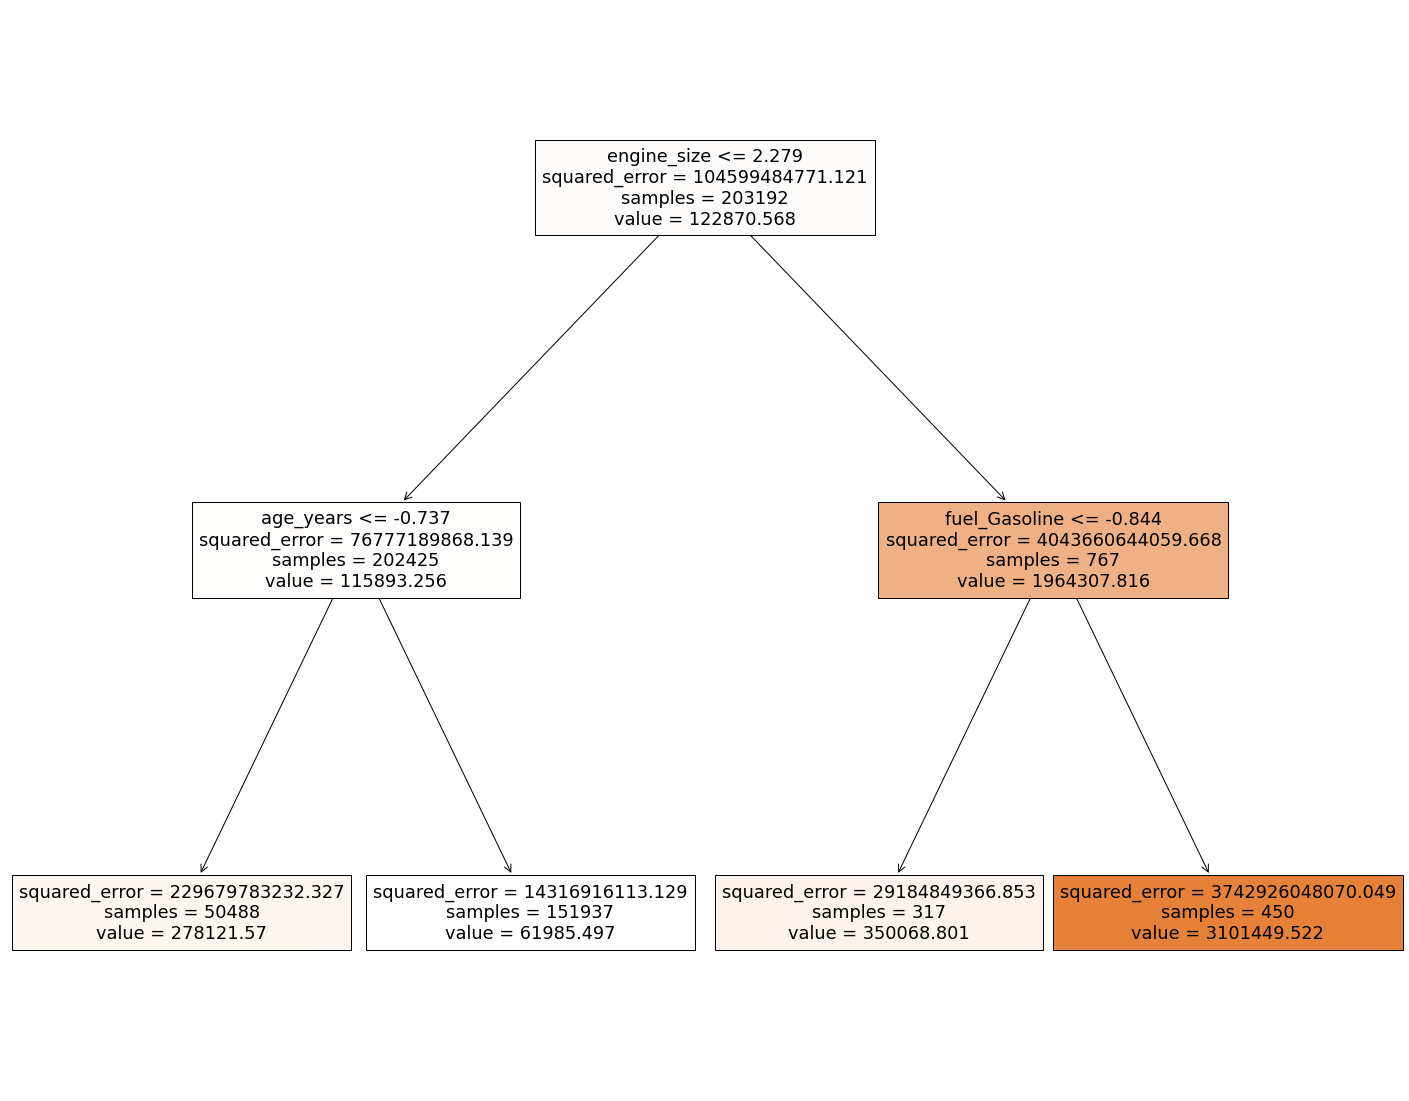

In [60]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg, feature_names=features, filled=True)

### Avaliando o modelo

In [61]:
y_pred_tree = tree_reg.predict(X_teste)
y_treino_pred_tree = tree_reg.predict(X_treino)
y_teste_pred_tree = tree_reg.predict(X_teste)
rmse_treino_tree = mean_squared_error(y_treino,y_treino_pred_tree,squared=False)
rmse_teste_tree = mean_squared_error(y_teste,y_teste_pred_tree,squared=False)

print("RMSE tree treino:",rmse_treino_tree)
print("RMSE tree teste:", rmse_teste_tree)

RMSE tree treino: 275880.1179014938
RMSE tree teste: 267169.85815105395


## Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor

randf = RandomForestRegressor(max_depth=2, random_state=0)
randf.fit(X_treino, y_treino)

2023/01/30 00:53:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '52a10ec7f6b5436abc64ab9d184b5294', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


RandomForestRegressor(max_depth=2, random_state=0)

### Avaliando o modelo

In [64]:
y_treino_pred_randf = randf.predict(X_treino)
y_teste_pred_randf = randf.predict(X_teste)
rmse_treino_randf = mean_squared_error(y_treino,y_treino_pred_randf,squared=False)
rmse_teste_randf = mean_squared_error(y_teste,y_teste_pred_randf,squared=False)

print("RMSE random forest treino:",rmse_treino_randf)
print("RMSE random forest teste:", rmse_teste_randf)

RMSE random forest treino: 275199.60585128824
RMSE random forest teste: 266554.50877245516


In [66]:
randf.score(X_treino, y_treino)

0.27595414808977115

In [68]:
randf.score(X_teste, y_teste)

0.29900014954513265